In [37]:
## importing libraries
import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [38]:
## Load dataset
df=pd.read_csv('train/train.csv')

In [39]:
# df.shape

## Data preprocessing

In [40]:
## Use to convert categorical data to numeric data
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\wajah\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

## Data pre-processing

In [42]:
df.head(10)

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,NaN,Ever wonder how Britain’s most iconic pop pian...,1
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,8,Excerpts From a Draft Script for Donald Trump’...,NaN,Donald J. Trump is scheduled to make a highly ...,0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0


In [43]:
## find missing vallues
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [44]:
## data division
df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [45]:
## replacing the null values with empty string
df=df.fillna('')

In [46]:
df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [47]:
## merging the author and  news title
df['content']=df['author']+' '+df['title']

In [49]:
df.head(10)

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0,Daniel Nussbaum Jackie Mason: Hollywood Would ...
6,6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1,Life: Life Of Luxury: Elton John’s 6 Favorite...
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0,Alissa J. Rubin Benoît Hamon Wins French Socia...
8,8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0,Excerpts From a Draft Script for Donald Trump...
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0,Megan Twohey and Scott Shane A Back-Channel Pl...


In [50]:
## take x and y to train a model
x=df.drop(columns='label',axis=1)
y=df['label']

In [51]:
x.head(5)

,id,title,author,text,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy Iranian woman jailed for fictio...


In [52]:
y

0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

## Stemming process
- reduce a word to its root word
### example
- actors,actress,acting-->act

In [16]:
port_stem=PorterStemmer()

In [17]:
def stemming(content):
    stemmed_content=re.sub('[^a-zA-Z]',' ',content)
    stemmed_content=stemmed_content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content
                    if not word in stopwords.words('english')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

In [18]:
df['content']=df['content'].apply(stemming)

In [19]:
df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [20]:
## seperating the data and values
X=df['content'].values
Y=df['label'].values

ValueError: x and y must be the same size

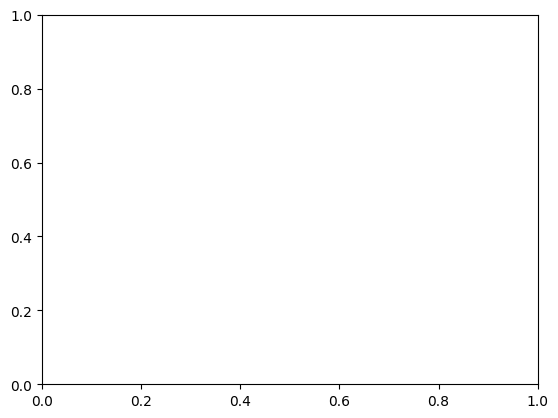

In [21]:
X

array(['darrel lucu hous dem aid even see comey letter jason chaffetz tweet',
       'daniel j flynn flynn hillari clinton big woman campu breitbart',
       'consortiumnew com truth might get fire', ...,
       'michael j de la merc rachel abram maci said receiv takeov approach hudson bay new york time',
       'alex ansari nato russia hold parallel exercis balkan',
       'david swanson keep f aliv'], dtype=object)

In [22]:
Y

array([1, 0, 1, ..., 0, 1, 1], dtype=int64)

In [23]:
vectorizer =TfidfVectorizer()

In [24]:
vectorizer.fit(X)

TfidfVectorizer()

In [25]:
X=vectorizer.transform(X)

In [26]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

# Spliting data into train and test

In [27]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [28]:
x_train.shape

(16640, 17128)

In [29]:
y_train.shape

(16640,)

### Training the model

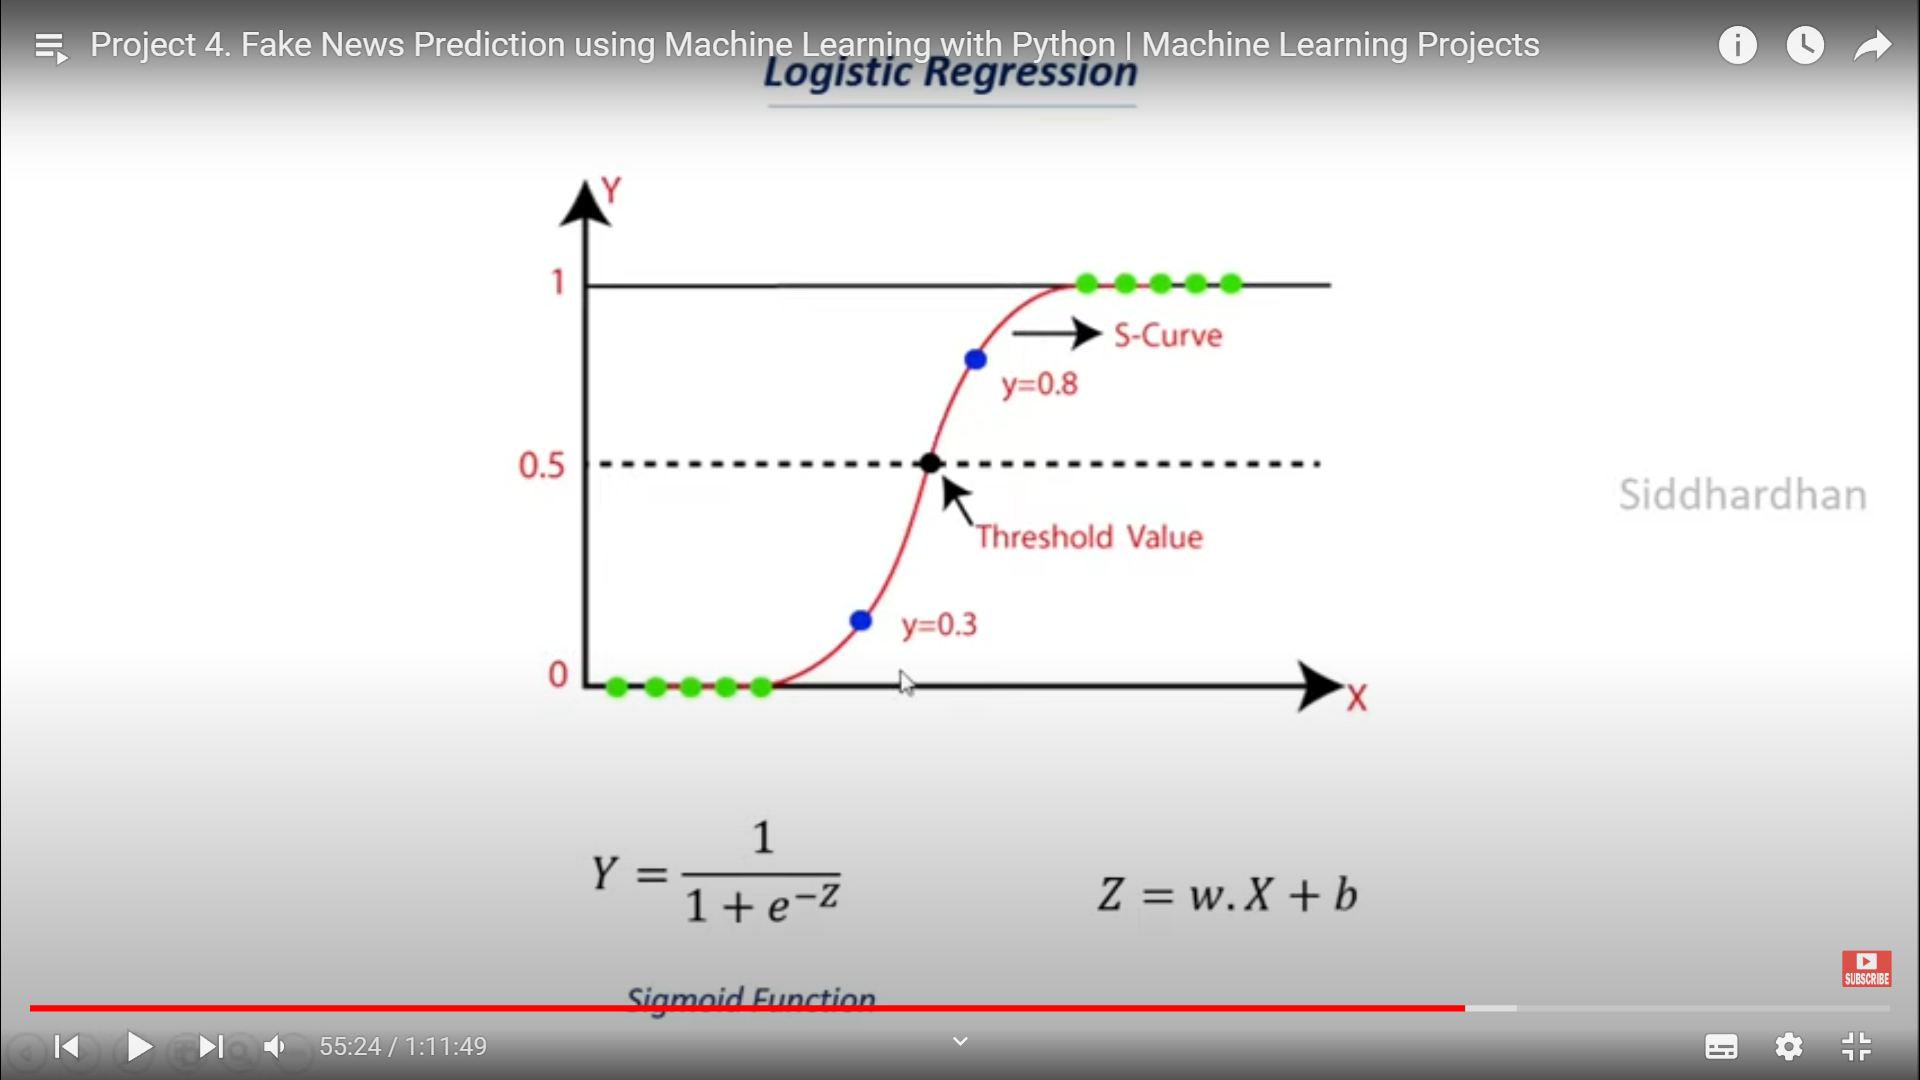

In [30]:
from IPython.display import Image
Image(filename='Logistic regression.png')

In [31]:
## Model training
model=LogisticRegression()

In [32]:
model.fit(x_train,y_train)

LogisticRegression()

In [33]:
## accuracy on training data 
x_train_pred=model.predict(x_train)
trainingg_data_pred=accuracy_score(x_train_pred,y_train)

In [34]:
trainingg_data_pred

0.9865985576923076

In [35]:
## accuracy on test data 
x_test_pred=model.predict(x_test)
test_data_pred=accuracy_score(x_test_pred,y_test)

In [36]:
test_data_pred

0.9790865384615385